In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
import pandas as pd 
import PIL
import PIL.Image
import keras


# 2.1

In [40]:
def gen_model():
    # Defines & compiles the model
    model = keras.models.Sequential([
        keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Dropout(rate=0.15),  # adding dropout regularization throughout the model to deal with overfitting
        # The second convolution
        keras.layers.Conv2D(32, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(rate=0.1),

        # The third convolution
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(rate=0.10),
        
        # Flatten the results to feed into a DNN
        keras.layers.Flatten(),
        # 512 neuron hidden layer
        keras.layers.Dense(512, activation='relu'),
        
        # 3 output neuron for the 3 classes of Animal Images
        keras.layers.Dense(3, activation='softmax')
    ])
    
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])
    return model


Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/2
150/150 ━━━━━━━━━━━━━━━━━━━━ 28s 154ms/step - acc: 0.4573 - loss: 1.3539 - val_acc: 0.5933 - val_loss: 0.7849
Epoch 2/2
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_loss: 0.0000e+00


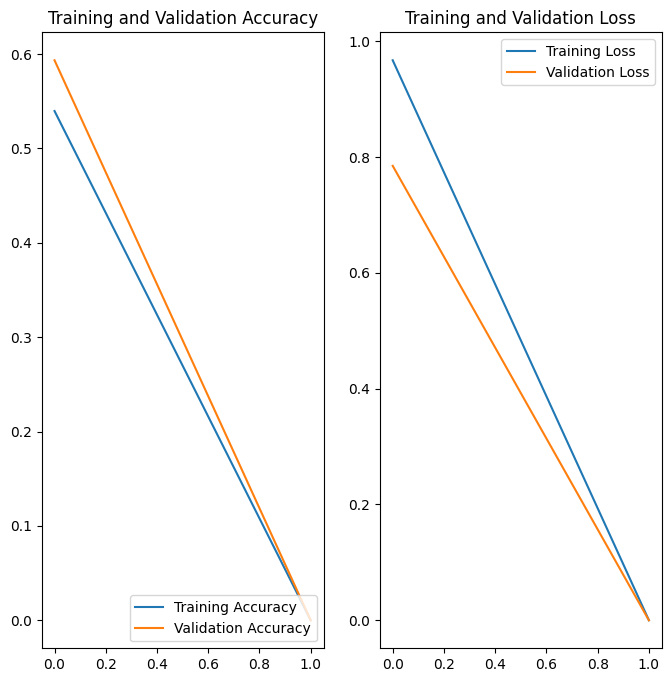

Training Accuracy: 0.0
Testing Accuracy: 0.0


In [41]:
def train_test_animals():
    from keras.src.legacy.preprocessing.image import ImageDataGenerator

    import matplotlib.pyplot as plt
    
    # Creates an instance of an ImageDataGenerator called train_datagen
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)
    
    # Training data
    train_generator = train_datagen.flow_from_directory('CNN_MultiClass_data/animals',
                                                        target_size=(150, 150),  # Resizes images
                                                        batch_size=15,
                                                        class_mode='categorical',
                                                        subset='training')
    
    # Testing data
    validation_generator = train_datagen.flow_from_directory('CNN_MultiClass_data/validation',
                                                             target_size=(150, 150),
                                                             batch_size=15,
                                                             class_mode='categorical',
                                                             subset='validation')  # set as validation data
    
    model = gen_model()
    
    # Model fitting for a number of epochs
    epochs = 2
    history = model.fit(
        train_generator,
        steps_per_epoch=150,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=50,
        verbose=1
    )

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # This code is used to plot the training and validation accuracy
    epochs_range = range(epochs)
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    
    plt.show()
    
    # returns accuracy of training
    print("Training Accuracy:", history.history['acc'][-1])
    print("Testing Accuracy:", history.history['val_acc'][-1])

train_test_animals()


In [42]:
from keras.models import Sequential

# Convert Images into Vectors
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)

train_generator = train_datagen.flow_from_directory(
    'CNN_MultiClass_data/animals',
    target_size=(150, 150),
    batch_size=15,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'CNN_MultiClass_data/animals',
    target_size=(150, 150),
    batch_size=15,
    class_mode='categorical',
    subset='validation'
)

#  Softmax Regression Model
model = Sequential([
    keras.layers.Flatten(input_shape=(150, 150, 3)),  # Flatten the 2D image into 1D vector
    keras.layers.Dense(3, activation='softmax')  # Output layer with 3 neurons for 3 classes and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


E:\ML\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
# Train the Model
epochs = 5
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.4464 - loss: 7.3919 - val_accuracy: 0.5213 - val_loss: 3.5219
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.5540 - loss: 2.6781 - val_accuracy: 0.5133 - val_loss: 3.9813
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 133us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.5395 - loss: 3.2506 - val_accuracy: 0.5600 - val_loss: 2.8282


In [44]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator, verbose=0)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Validation Accuracy: 56.00%


In [45]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

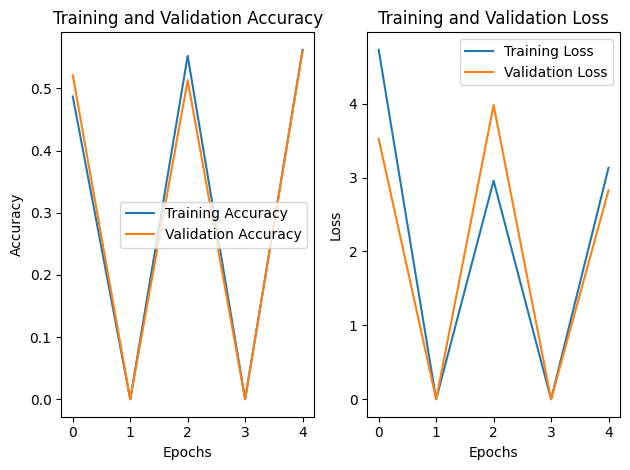

In [46]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [47]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Function to preprocess data and reduce dimensions using PCA
def preprocess_data_pca():
    train_datagen = ImageDataGenerator(rescale=1./255)
    
    train_generator = train_datagen.flow_from_directory(
        'CNN_MultiClass_data/animals',
        target_size=(150, 150),
        batch_size=15,
        class_mode='categorical',
        shuffle=False
    )
    
    # Get the total number of samples
    total_samples = len(train_generator.filenames)
    num_classes = len(train_generator.class_indices)
    
    # Initialize arrays to store image vectors and labels
    image_vectors = np.zeros((total_samples, 150*150*3))
    labels = np.zeros((total_samples,))
    
    # Populate image vectors and labels
    i = 0
    for batch_images, batch_labels in train_generator:
        start = i * train_generator.batch_size
        end = start + train_generator.batch_size
        image_vectors[start:end] = batch_images.reshape(-1, 150*150*3)
        labels[start:end] = np.argmax(batch_labels, axis=1)
        
        i += 1
        if i * train_generator.batch_size >= total_samples:
            break
    
    # Apply PCA to reduce dimensions to 225
    pca = PCA(n_components=225)
    reduced_vectors = pca.fit_transform(image_vectors)
    
    # Convert labels to one-hot encoding
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(labels)
    one_hot_labels = to_categorical(integer_encoded, num_classes=num_classes)
    
    return reduced_vectors, one_hot_labels

In [48]:
def gen_model():
    # Defines & compiles the model
    model = keras.models.Sequential([
        keras.layers.Dense(512, activation='relu', input_shape=(225,)),
        keras.layers.Dropout(rate=0.5),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(rate=0.3),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(rate=0.2),
        keras.layers.Dense(3, activation='softmax')
    ])
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    return model


In [49]:
# Function to train ANN model with reduced-dimension data
def train_ann_with_pca(reduced_vectors, one_hot_labels):
    model = gen_model()
    
    # Split data into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(
        reduced_vectors, one_hot_labels, test_size=0.25, random_state=42
    )
    
    # Train the model
    history = model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(x_val, y_val),
        verbose=1
    )
    
    return history

# Train ANN model with PCA-reduced data
reduced_vectors, one_hot_labels = preprocess_data_pca()
history = train_ann_with_pca(reduced_vectors, one_hot_labels)

# Print training and validation accuracies
print("Training Accuracy:", history.history['acc'][-1])
print("Validation Accuracy:", history.history['val_acc'][-1])

Found 3000 images belonging to 3 classes.


MemoryError: Unable to allocate 1.51 GiB for an array with shape (3000, 67500) and data type float64

# 2.2


In [ ]:
def gen_model():
    model = keras.models.Sequential([
        keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Dropout(rate=0.3),
        
        keras.layers.Conv2D(32, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Dropout(rate=0.4),
        
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Dropout(rate=0.5),
        
        keras.layers.Flatten(),
        
        keras.layers.Dense(512, activation='relu'),
        
        # 2 output neurons for dogs and cats
        keras.layers.Dense(2, activation='softmax')
    ])
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    
    return model

In [ ]:
def train_test_animals():
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)

    train_generator = train_datagen.flow_from_directory('CNN_MultiClass_data/animals',
                                                        target_size=(150, 150),
                                                        batch_size=15,
                                                        class_mode='categorical',
                                                        subset='training',
                                                        # Update classes
                                                        classes=['cats', 'dogs'])

    validation_generator = train_datagen.flow_from_directory('CNN_MultiClass_data/validation',
                                                             target_size=(
                                                                 150, 150),
                                                             batch_size=15,
                                                             class_mode='categorical',
                                                             subset='validation',
                                                             # Update classes
                                                             classes=['cats', 'dogs'])

    model = gen_model()

    epochs = 2
    history = model.fit(
        train_generator,
        steps_per_epoch=150,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=50,
        verbose=1
    )

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

    print("Training Accuracy:", history.history['acc'][-1])
    print("Validation Accuracy:", history.history['val_acc'][-1])


train_test_animals()

In [ ]:
def gen_model():
    model = keras.models.Sequential([
        keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Dropout(rate=0.1),
        
        keras.layers.Conv2D(32, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Dropout(rate=0.2),
        
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Dropout(rate=0.3),
        
        keras.layers.Flatten(),
        
        keras.layers.Dense(512, activation='relu'),
        
        # 2 output neurons for dogs and cats
        keras.layers.Dense(2, activation='softmax')
    ])
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    
    return model

def train_test_animals():
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)
    
    train_generator = train_datagen.flow_from_directory('CNN_MultiClass_data/animals',
                                                        target_size=(150, 150),
                                                        batch_size=15,
                                                        class_mode='categorical',
                                                        subset='training',
                                                        classes=['cats', 'dogs'])  # Update classes
    
    validation_generator = train_datagen.flow_from_directory('CNN_MultiClass_data/validation',
                                                             target_size=(150, 150),
                                                             batch_size=15,
                                                             class_mode='categorical',
                                                             subset='validation',
                                                             classes=['cats', 'dogs'])  # Update classes
    
    model = gen_model()
    
    epochs = 2
    history = model.fit(
        train_generator,
        steps_per_epoch=150,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=50,
        verbose=1
    )

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(epochs)
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    
    plt.show()
    
    print("Training Accuracy:", history.history['acc'][-1])
    print("Validation Accuracy:", history.history['val_acc'][-1])

train_test_animals()